# Music Effect on Mental Health

Data from [Kaggle](https://www.kaggle.com/code/totoro29/music-and-mental-condition/data)

## Introduction 

Can music impact mental health? Many people believe that music can impact their mental health. In fact, there is a field of research that suggests that music can impact the brain. Music, they believe can relieve stress, improve mood and overall mental state. It is called Music Therapy. In this project we will examine the effect of music on mental health. 

> I was listening to music while doing this project just to confirm the theory. I will tell you the result later 😉.

- **Timestamp**: Date and time when form was submitted
Age

- **Age**: Respondent's age
- **Primary streaming service**: Respondent's primary streaming service

- **Hours per day**: Number of hours the respondent listens to music per day 

- **While working**: Does the respondent listen to music while studying/working?

- **Instrumentalist**: Does the respondent play an instrument regularly?

- **Composer**: Does the respondent compose music?

- **Fav genre**: Respondent's favorite or top genre
- **Exploratory**: Does the respondent actively explore new artists/genres?
  
- **Foreign languages**: Does the respondent regularly listen to music with lyrics in a language they are not fluent in?

In [93]:
# import the libraries
from siuba import * 
from siuba.siu import call 
import pandas as pd 
import matplotlib.pyplot as plt
# import seaborn as sns

plt.style.use("seaborn")

# import the data 
music_raw = pd.read_csv("mxmh_survey_results.csv")

music_raw >> head()

/tmp/ipykernel_34061/2971426948.py:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [94]:
# make a copy of the original data 
music = music_raw.copy()

In [95]:
music >> head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Checking the data

In [96]:
music >> _.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [97]:
# 33 columns 
music >> _.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [98]:
# summary statistics
music >> _.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [100]:
music >> _.describe(exclude ="number").T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


### Cleaning the data 


In [101]:
music.columns = music  >> _.columns.str.lower().str.replace(" ", "_") # lower case the column names

music >> head()

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,...,frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [103]:
# Removing Outliers from age, hours per day and bpm columns

music = music >> filter((_.age < 70) | (_.hours_per_day <= 14) | (_.bpm <= 200))

music >> head()

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,...,frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [104]:
music >> _.shape

(736, 33)

In [105]:
# remove columns we dont need 

music = music >> select(~_.timestamp, ~_.permissions)

music >> head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [106]:
# Checking Correlation
music >> _.corr() >> select(_.age) >> arrange(-_.age)

/home/boadzie/Documents/Dev_Master/Projects/wave_music_and_mental_health/.myenv/lib/python3.10/site-packages/siuba/siu/calls.py:189: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age
age,1.000000
insomnia,0.006909
bpm,-0.029928
hours_per_day,-0.044638
depression,-0.121563
ocd,-0.130114
anxiety,-0.176662


/tmp/ipykernel_34061/3253095773.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

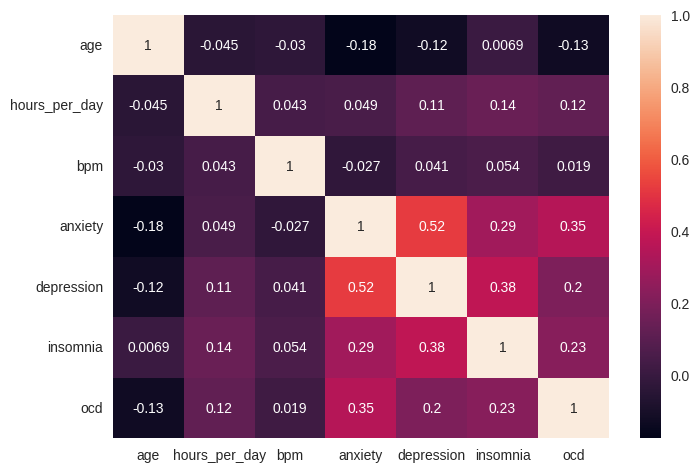

In [107]:
# visualize it 
import seaborn as sns 

music >> call(sns.heatmap, annot=True, data=music.corr())

In [108]:
# Deal with missing values
music >> _.isna().sum()

age                               1
primary_streaming_service         1
hours_per_day                     0
while_working                     3
instrumentalist                   4
composer                          1
fav_genre                         0
exploratory                       0
foreign_languages                 4
bpm                             107
frequency_[classical]             0
frequency_[country]               0
frequency_[edm]                   0
frequency_[folk]                  0
frequency_[gospel]                0
frequency_[hip_hop]               0
frequency_[jazz]                  0
frequency_[k_pop]                 0
frequency_[latin]                 0
frequency_[lofi]                  0
frequency_[metal]                 0
frequency_[pop]                   0
frequency_[r&b]                   0
frequency_[rap]                   0
frequency_[rock]                  0
frequency_[video_game_music]      0
anxiety                           0
depression                  

In [109]:
import numpy as np

music = music >> mutate(age = np.round(_.age.fillna(_.age.mean()), 1), 
primary_streaming_service= _.primary_streaming_service.fillna(_.primary_streaming_service.mode()[0]),
while_working = _.while_working.fillna(_.while_working.mode()[0]),
instrumentalist  = _.instrumentalist.fillna(_.instrumentalist.mode()[0]),
composer = _.composer.fillna(_.composer.mode()[0]),
foreign_languages  = _.foreign_languages.fillna(_.foreign_languages.mode()[0]),
music_effects  = _.music_effects.fillna(_.music_effects.mode()[0]),
)

music >> head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [110]:
music >> _.isna().sum()

age                               0
primary_streaming_service         0
hours_per_day                     0
while_working                     0
instrumentalist                   0
composer                          0
fav_genre                         0
exploratory                       0
foreign_languages                 0
bpm                             107
frequency_[classical]             0
frequency_[country]               0
frequency_[edm]                   0
frequency_[folk]                  0
frequency_[gospel]                0
frequency_[hip_hop]               0
frequency_[jazz]                  0
frequency_[k_pop]                 0
frequency_[latin]                 0
frequency_[lofi]                  0
frequency_[metal]                 0
frequency_[pop]                   0
frequency_[r&b]                   0
frequency_[rap]                   0
frequency_[rock]                  0
frequency_[video_game_music]      0
anxiety                           0
depression                  

In [111]:
fav_gen_unique = music >> _.fav_genre.unique()

In [129]:
music = music >> mutate(bpm = _.bpm.replace(999999999.0, _.bpm.median()))

In [134]:
music.bpm.max()

624.0

In [135]:
music = music >> mutate(bpm = _.bpm.replace(624.0, _.bpm.median()))

<AxesSubplot: xlabel='bpm', ylabel='Count'>

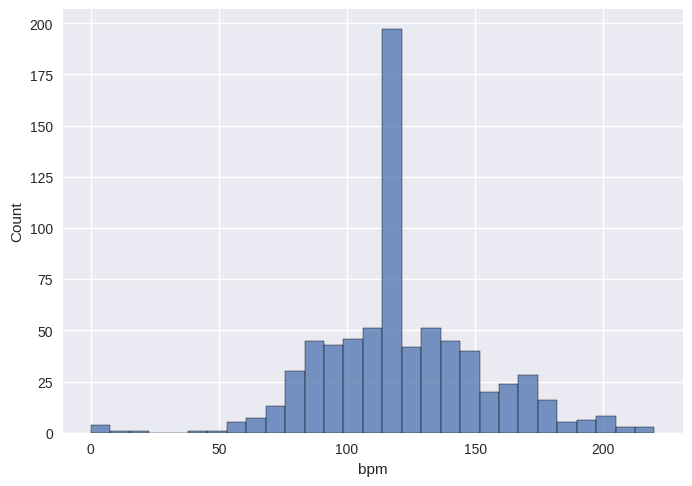

In [137]:
music >> mutate(bpm = np.round(_.bpm.fillna(_.bpm.median()), 1)) >> \
call(sns.histplot, x="bpm", data=_)

In [139]:
# fillna on bpm column
music = music >> mutate(bpm = np.round(_.bpm.fillna(_.bpm.median()), 1)) 

In [140]:
music >> _.isna().sum() # no missing values

age                             0
primary_streaming_service       0
hours_per_day                   0
while_working                   0
instrumentalist                 0
composer                        0
fav_genre                       0
exploratory                     0
foreign_languages               0
bpm                             0
frequency_[classical]           0
frequency_[country]             0
frequency_[edm]                 0
frequency_[folk]                0
frequency_[gospel]              0
frequency_[hip_hop]             0
frequency_[jazz]                0
frequency_[k_pop]               0
frequency_[latin]               0
frequency_[lofi]                0
frequency_[metal]               0
frequency_[pop]                 0
frequency_[r&b]                 0
frequency_[rap]                 0
frequency_[rock]                0
frequency_[video_game_music]    0
anxiety                         0
depression                      0
insomnia                        0
ocd           

In [141]:
# save the data for later use 
music.to_csv("music_mental_survey_clean.csv")

In [1]:
# read in the data 
import pandas as pd
from siuba import *
music = pd.read_csv("music_mental_survey_clean.csv")

music >> head()

,Unnamed: 0,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,...,frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects
0,0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [2]:
music = music >> select(~_["Unnamed: 0"]) # remove unwanted column

In [3]:
music >> head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


### Data Visualization 


In [ ]:
%pip install nbformat

#### Univariate Analysis

In [64]:
import plotly.express as px 
from plotly import io as pio
from siuba.siu import call

pio.templates.default = "plotly_white"

music >> call(px.histogram, x="age", data_frame=_, 
labels={"age": "Age"})


People with ages between 16 and 24 are listen to music a lot

In [68]:

music >> call(px.histogram, x="hours_per_day", data_frame=_,
labels={"hours_per_day": "Hours Per Day"})

People working less (1-3 hours) turn to listen to music more that those who work more.

In [66]:
music >> call(px.histogram, x="bpm", data_frame=_,
labels={"bpm": "BPM"})

Most of the song are heard in a range of 100 - 125 BPM

In [67]:
music >> call(px.histogram, x="primary_streaming_service", 
data_frame=_, labels={"primary_streaming_service": "Primary Streaming Service"})

Spotify is the most used streaming service followed by Youtube Music

In [69]:
music >> call(px.histogram, x="while_working", data_frame=_,
labels={"while_working": "While Working"})

Most people(about 80%) like to hear music while working

In [74]:
music >> call(px.histogram, x="frequency_[classical]", 
data_frame=_, 
labels={"frequency_[classical]": "Frequency of Classical Music"})

Most people hardly(35%) listen to classical music. 23% never listen to classical music while 15% of people listen to classical music very frequently

In [75]:
music >> call(px.histogram, x="frequency_[country]", 
data_frame=_, labels={"frequency_[country]": "Frequency of Country Music"})

47% of people of never listen to country music. Only 7% of people listen to country very frequently while 32% of people rarely listen to country music.

In [77]:
music >> call(px.histogram, x="frequency_[gospel]", 
data_frame=_, labels={"frequency_[gospel]": "Frequency of Gospel Music"})

In [78]:
music >> call(px.histogram, x="frequency_[r&b]", data_frame=_,
labels={"frequency_[r&b]": "Frequency of R&B Music"})

In [79]:
music >> call(px.histogram, x="frequency_[rap]", data_frame=_,
labels={"frequency_[rap]": "Frequency of Rap Music"})

In [80]:
music >> call(px.histogram, x="frequency_[rock]", data_frame=_,
labels={"frequency_[rock]": "Frequency of Rock Music"})

45% of people hear rock very frequently, thus making rock a very popular music genre.

In [81]:
music >> call(px.histogram, x="frequency_[video_game_music]", data_frame=_,
labels={"frequency_[video_game_music]": "Frequency of Video Game Music"})

In [82]:
music >> call(px.histogram, x="frequency_[pop]", data_frame=_,
labels={"frequency_[pop]": "Frequency of Pop Music"})

38% of the people listen to pop music making it another popular music genre.

#### Bivariate Analysis

In [83]:
music >> call(px.box, x="fav_genre", y="age", data_frame=_, 
title="Music Genre by Age", labels={"fav_genre": "Fav Genre", "age": "Age"})

People around the age of 20 love Latin, K Pop and Rap.

In [84]:
music >> call(px.box, x="fav_genre", y="hours_per_day", 
data_frame=_, title="Genre based on the number of hours of work per day",
labels={"fav_genre": "Fav Genre", "hours_per_day": "Hours Per Day"})

People who work 12 hours per day listen to Latin and Jazz more.

In [87]:
fig = music >> call(px.histogram, x="fav_genre", y="anxiety", data_frame=_, 
title="Music Genre and Anxiety level ",
text_auto=True, histfunc='avg',
labels={"fav_genre": "Fav Genre"}
)
fig.update_yaxes(range=[0, 8], title="Avg of Anxiety")

Rock, K pop, Hip pop, Pop, Folk and Lofi listeners have anxiety levels above 6 while people who listen to other genres have anxiety levels below 6.

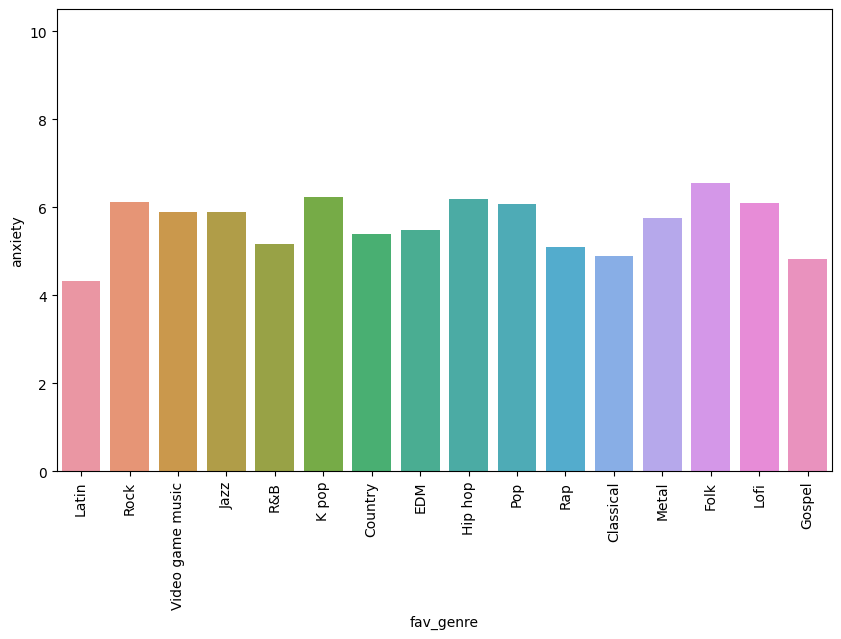

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

music >> call(sns.barplot, x="fav_genre", y="anxiety", data=_, errwidth=0)
plt.xticks(rotation=90);


In [89]:

fig = music >> call(px.histogram, x="fav_genre", y="insomnia", 
data_frame=_, text_auto=True, histfunc='avg',
labels={"fav_genre": "Fav Genre"})

fig.update_yaxes(title="Avg of Insomnia", range=[0, 6])


All the listeners have insomnia level below 4 except Metal, Lofi and Gospel listeners.

In [90]:
music >> call(px.histogram, x="fav_genre", y="age", 
  color="music_effects", data_frame=_, 
  text_auto=True, histfunc='avg', barmode='group', 
  title="Music Effect on Listeners - Age", 
  labels={"fav_genre": "Fav Genre", "age": "Age"})


Most of the listeners are below the age of 30. People who love Gospel showed the most improvement while Rock, Video Game Music, Pop, Rap and Classical music lovers showed some form of deterioration.

In [91]:
music >> call(px.histogram, x="fav_genre", y="ocd", 
  color="music_effects", data_frame=_, 
  text_auto=True, histfunc='avg', barmode='group', 
  title="Music Effect on Listeners - OCD",
  labels={"fav_genre": "Fav Genre", "ocd": "OCD"})


classical  music listeners have the highest level of OCD while Rap music listeners have the lowest level of OCD.

In [92]:
fig = music >> call(px.histogram, y="insomnia", x="fav_genre", 
  color="music_effects", data_frame=_, 
  text_auto=True, histfunc='avg', barmode='group', 
  title="Music Effect on Listeners - Insomnia",
  labels={"fav_genre": "Fav Genre", "insomnia": "Insomnia"}
  )

fig.update_yaxes(title="Insomnia", range=[0, 10])

Video Game music lovers have the highest average level of insomnia while classical music lovers have the lowest.

In [93]:
fig = music >> call(px.histogram,  x="fav_genre", y="depression", 
  color="music_effects", data_frame=_, 
  text_auto=True, histfunc='avg', barmode='group', 
  title="Music Effect on Listeners - Depression",
  labels={"fav_genre": "Fav Genre", "depression": "Depression"})

fig.update_yaxes(title="Depression", range=[0, 10])

People who listen to Rock, Video Game Music, Pop and classical music have the highest level of Depression.

### Conclusion 

We conclude that the effect of music on mental health is in both ways. While some type of music improve mental health, others do not. It is therefore crucial to choose the type of music you listen to, wisely. Music however, does impact mental health either for good or for bad.

#### References

1. [https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)


2. https://www.kaggle.com/code/totoro29/music-and-mental-condition/notebook(https://www.kaggle.com/code/totoro29/music-and-mental-condition/notebook)